In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [4]:
df=pd.read_csv("s:/Uber analysis/Uber Drives.csv")

In [5]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


data pre processing


In [6]:
#null value

df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [7]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
#number of null values

df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [14]:
#droping null values
df=df.dropna()

In [15]:
df.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

working with data types

In [17]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [19]:
#changing the data type of stratdate and enddate from object to date

df["START_DATE*"]=pd.to_datetime(df["START_DATE*"], format="%m/%d/%Y %H:%M")
df["END_DATE*"]=pd.to_datetime(df["END_DATE*"], format="%m/%d/%Y %H:%M")

In [20]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [21]:
#making new col from start date

hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

#storing the values by iterating

for x in df["START_DATE*"]:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

#giving col names
df["HOUR"]=hour
df["DAY"]=day
df["DAY OF WEEK"]=dayofweek
df["MONTH"]=month
df["WEEKDAY"]=weekday


In [23]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


object to numeric representation

In [35]:
df_numerize=df

for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == "object"):
        df_numerize[col_name]=df_numerize[col_name].astype("category")
        df_numerize[col_name]=df_numerize[col_name].cat.codes

In [36]:
df_numerize.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,35,32,5.1,6,21,1,4,1,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,35,32,4.8,5,20,2,5,1,2


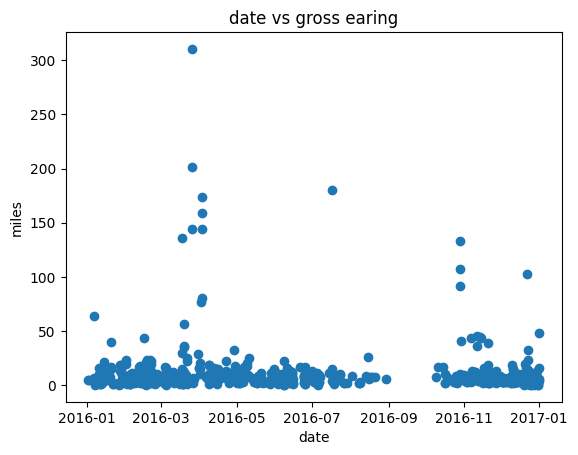

In [37]:
# startdate vs miles

#scatter plot with start date with miles
plt.scatter(x=df["START_DATE*"],y=df["MILES*"])
plt.title("date vs gross earing")
plt.xlabel("date")
plt.ylabel("miles")
plt.show()

Corelation

In [41]:
df_numerize

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,35,32,5.1,6,21,1,4,1,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,35,32,4.8,5,20,2,5,1,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,35,32,4.7,7,17,5,1,1,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,35,130,63.7,4,14,6,2,1,6
5,2016-01-06 17:15:00,2016-01-06 17:19:00,0,125,130,4.3,6,17,6,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,0,52,53,0.7,7,1,31,5,12,2
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,0,52,124,3.9,9,13,31,5,12,2
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,0,120,124,16.2,7,15,31,5,12,2
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,0,54,35,6.4,9,21,31,5,12,2


In [46]:
df_numerize.corr()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
CATEGORY*,1.000000,-0.028177,-0.009577,0.102245,0.018798,-0.079833,0.021225,-0.050741,0.014150,-0.055350
START*,-0.028177,1.000000,0.323234,-0.031628,-0.026723,0.033154,0.074753,-0.049330,-0.009675,0.133749
STOP*,-0.009577,0.323234,1.000000,-0.016518,0.046602,-0.102708,0.083441,-0.074242,-0.023356,0.110914
MILES*,0.102245,-0.031628,-0.016518,1.000000,-0.032295,-0.004370,0.022724,0.104710,-0.067137,-0.098058
PURPOSE*,0.018798,-0.026723,0.046602,-0.032295,1.000000,-0.025557,0.016611,0.034873,-0.061049,-0.035305
HOUR,-0.079833,0.033154,-0.102708,-0.004370,-0.025557,1.000000,-0.053598,0.039669,0.095491,0.016810
DAY,0.021225,0.074753,0.083441,0.022724,0.016611,-0.053598,1.000000,0.021694,0.160147,0.045568
DAY OF WEEK,-0.050741,-0.049330,-0.074242,0.104710,0.034873,0.039669,0.021694,1.000000,-0.054480,-0.246599
MONTH,0.014150,-0.009675,-0.023356,-0.067137,-0.061049,0.095491,0.160147,-0.054480,1.000000,0.040674
WEEKDAY,-0.055350,0.133749,0.110914,-0.098058,-0.035305,0.016810,0.045568,-0.246599,0.040674,1.000000


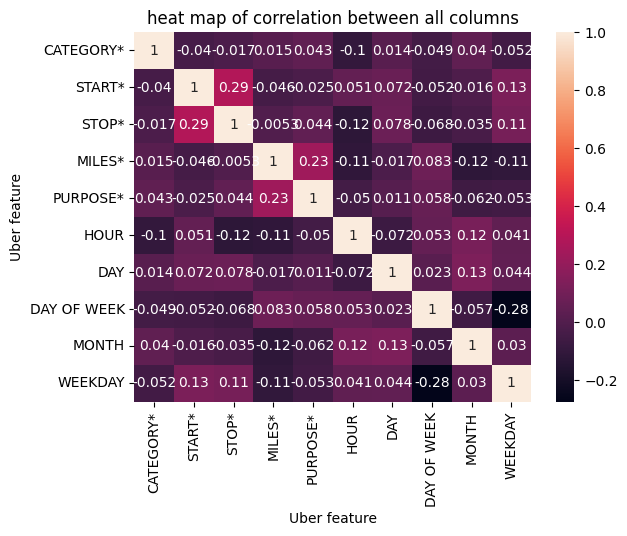

In [44]:
# corelation 

correlation_matrix=df_numerize.corr(method="spearman")
sns.heatmap(correlation_matrix,annot=True)
plt.title("heat map of correlation between all columns")
plt.xlabel("Uber feature")
plt.ylabel("Uber feature")
plt.show()

In [47]:
corelation_mat=df_numerize.corr()
corr_pair=corelation_mat.unstack()
corr_pair

CATEGORY*  CATEGORY*      1.000000
           START*        -0.028177
           STOP*         -0.009577
           MILES*         0.102245
           PURPOSE*       0.018798
                            ...   
WEEKDAY    HOUR           0.016810
           DAY            0.045568
           DAY OF WEEK   -0.246599
           MONTH          0.040674
           WEEKDAY        1.000000
Length: 100, dtype: float64

In [48]:
sorted_pair=corr_pair.sort_values()
sorted_pair

DAY OF WEEK  WEEKDAY       -0.246599
WEEKDAY      DAY OF WEEK   -0.246599
STOP*        HOUR          -0.102708
HOUR         STOP*         -0.102708
WEEKDAY      MILES*        -0.098058
                              ...   
MILES*       MILES*         1.000000
STOP*        STOP*          1.000000
START*       START*         1.000000
MONTH        MONTH          1.000000
WEEKDAY      WEEKDAY        1.000000
Length: 100, dtype: float64

In [56]:
high_corr=sorted_pair[(sorted_pair)>0.1]
high_corr

CATEGORY*    MILES*         0.102245
MILES*       CATEGORY*      0.102245
             DAY OF WEEK    0.104710
DAY OF WEEK  MILES*         0.104710
WEEKDAY      STOP*          0.110914
STOP*        WEEKDAY        0.110914
WEEKDAY      START*         0.133749
START*       WEEKDAY        0.133749
DAY          MONTH          0.160147
MONTH        DAY            0.160147
START*       STOP*          0.323234
STOP*        START*         0.323234
CATEGORY*    CATEGORY*      1.000000
DAY OF WEEK  DAY OF WEEK    1.000000
DAY          DAY            1.000000
HOUR         HOUR           1.000000
PURPOSE*     PURPOSE*       1.000000
MILES*       MILES*         1.000000
STOP*        STOP*          1.000000
START*       START*         1.000000
MONTH        MONTH          1.000000
WEEKDAY      WEEKDAY        1.000000
dtype: float64

category and miles has highest corelation